In [28]:
import sys
import numpy as np
import matplotlib.pyplot as plt
sys.executable

'/usr/bin/python3'

In [0]:
def sigma_(x):
    if (x>0):
        return 1/(1+np.exp(-x))
    return np.exp(x)/(1+np.exp(-x))

In [0]:
x = np.array([1,2])

In [0]:
sigma_vect = np.vectorize(sigma)

In [32]:
sigma_vect(x)

array([0.73105858, 0.88079708])

In [0]:
def softmax(x):
    max_elem = np.max(x, axis = 0) # max value in each column
    y = x - max_elem # subtracts the maximum value from each element
    y = np.exp(y)
    sums = np.sum(y, axis = 0)
    return y / sums

In [34]:
x = np.random.rand(3, 4)
print(x)
print(softmax(x))

[[0.06747897 0.19989931 0.43598873 0.16821064]
 [0.79199384 0.99568157 0.32231565 0.08308384]
 [0.74934694 0.56345312 0.11517537 0.04539289]]
[[0.19836161 0.21484095 0.38195516 0.35678344]
 [0.40936474 0.47612491 0.34091396 0.32766842]
 [0.39227364 0.30903415 0.27713087 0.31554814]]


Logistic regression

In [0]:
C = 4 #class
N_class = 20 # points

centers= np.array([[-1,0], [0,-1], [1,0], [0,1]]).T #[x][y]
X = np.random.randn(2, C, N_class) * 0.2 + centers.reshape(2, C, 1) # 3 
X = X.reshape(2,-1) #2
y_label = np.zeros((C, N_class))
y_label[:,:] = np.arange(C).reshape(-1,1)
y_label = y_label.reshape(-1)

In [36]:
print(y_label)

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 2. 2. 2. 2. 2. 2. 2. 2.
 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3.
 3. 3. 3. 3. 3. 3. 3. 3.]


In [37]:
print(X.shape)

(2, 80)


In [0]:
def plotPoints(X, y_label):
    colors = {0: [1,0,0], 1: [0,1,0],
             2:[0,0,1], 3: [1,1,0]}
    points_colors = [colors[y_label[i]]
    for i in range(y_label.size)]
    plt.scatter(X[0],X[1], c = points_colors)
    plt.show()
    

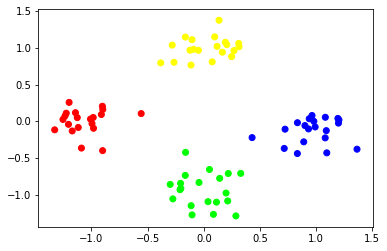

In [39]:
plotPoints(X, y_label)

In [0]:
def getLinearFeatures(X): # add a line of units 1
    return np.vstack((np.ones(X.shape[1]),X))

In [0]:
X_train = getLinearFeatures(X)

In [0]:
def one_hot_encoding(y_label): #
    C = int(y_label.max() + 1)
    enc = np.zeros((C, y_label.size)) #array 0 
    enc[y_label.astype(int), np.arange(y_label.size)] = 1
    return enc

In [43]:
print(y_label)

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 2. 2. 2. 2. 2. 2. 2. 2.
 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3.
 3. 3. 3. 3. 3. 3. 3. 3.]


In [44]:
y_1 = np.array([1,2,3,0,2,3])
print(one_hot_encoding(y_1))

[[0. 0. 0. 1. 0. 0.]
 [1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 1. 0.]
 [0. 0. 1. 0. 0. 1.]]


In [0]:
def train(X_train, y_label ,iters = 10, alpha = 0.1):
    y = one_hot_encoding(y_label)
    C = y.shape[0]
    Nfeatures = X_train.shape[0]
    Nsamples = X_train.shape[1]
    W = np.random.rand(C, Nfeatures)
    for i in range(iters):
        z = softmax(W @ X_train)
        delta = z - y
        gradW = delta @ X_train.T
        W = W - alpha * gradW
    return W

In [0]:
W_opt = train(X_train, y_label)

In [47]:
print(W_opt)

[[ 0.25829941 -3.39595978  0.58684371]
 [ 0.62505821  0.41226752 -3.16432108]
 [ 0.48797719  4.59190256  0.3362146 ]
 [ 0.62505925  0.79754269  4.30957649]]


In [0]:
def predict(xx, yy, W_opt):
    x_1 = xx.reshape(-1)
    y_1 = yy.reshape(-1)
    X = getLinearFeatures(np.vstack((x_1, y_1)))
    y = np.argmax(W_opt @ X, axis = 0)
    return y.reshape(xx.shape)

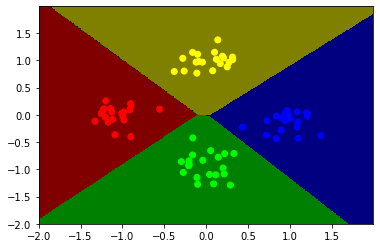

In [49]:
x = np.arange(-2,2,0.01)
y = np.arange(-2,2,0.01)
xx, yy = np.meshgrid(x,y)
colors = {0:[0.5, 0, 0],
          1:[0, 0.5, 0],
          2:[0, 0, 0.5],
          3:[0.5, 0.5, 0]}
labels = predict(xx, yy, W_opt)
plt.contourf(x, y, labels, levels = [-0.5, 0.5, 1.5, 2.5, 3.5], 
             colors = [[0.5, 0, 0], [0, 0.5, 0],[0, 0, 0.5], [0.5, 0.5, 0]])
plotPoints(X,y_label)